# Face Recognition Experiments

This notebook documents my attempts at building a convolutional neural network (CNN) to recognize a human face within an image.  I did this with three experiments using different images sets, each getting signficantly worse results.

Experiment 1: Used 919 human faces, 468 dog faces and 334 non-face pictures.   This experiment erroneously combined human and dog faces since I thought it was supposed to just identify faces, of whatever species.  The result was a network that had over 80% accuracy.  These images where divided into two categories: Yes (there is a face in the picture) and No (there is no face in the picture).  Additionally, I limited the number of faces to 2 per picture and deleted any that had features that I thought might confuse the network, like distortions or strange makeup.

Experiment 2: Thinking that more data would make a better network, I removed the dog faces and increased the number of positive category images to around 2202.  My criteria was a bit more loose in that faces with painting were included. I reasoned that if I could identify it as a face, so should the network.  Likewise, I increased the negative category images to  1384.  Finally, since the initial performance was much worse, I used an Keras' Image Generator to provide more variety.  It didn't help much. Overall, the accuracy decrease by about 16% with the additional images.

Experiment 3: Since the final network needs to distinguish between canine and human faces, I added the 468 dog faces to the negative category. This resulted in an additional decrease of around 7% in accuracy.

This is, overall, quite illogical.

In [1]:
# Load Libraries
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Dense, Activation, Flatten
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras import optimizers

np.random.seed(42)

Using TensorFlow backend.


In [2]:
## Define Functions
# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 2)
    return dog_files, dog_targets


def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)



# load train, test, and validation datasets
def load_data(path):
    global train_files, train_targets, train_tensors
    global valid_files, valid_targets, valid_tensors
    global test_files, test_targets, test_tensors

    all_files, all_targets = load_dataset(path)

    all_cnt = int(len(all_files))
    train_idx = int(0.5 * all_cnt)
    valid_idx = int(0.3 * all_cnt + train_idx)
    test_idx = int(0.2 * all_cnt + valid_idx)

    np.random.seed(42)
    shuffled = np.random.choice(all_cnt,all_cnt).astype(int)
    train_files   = all_files[shuffled[:train_idx]]
    train_targets = all_targets[shuffled[:train_idx]]

    valid_files   = all_files[shuffled[train_idx:valid_idx]]
    valid_targets = all_targets[shuffled[train_idx:valid_idx]]

    test_files   = all_files[shuffled[valid_idx:test_idx+1]]
    test_targets = all_targets[shuffled[valid_idx:test_idx+1]]

    for i in range(len(valid_files)):
        #print(valid_files[i][8:10],valid_targets[i])
        if (
                (valid_files[i][8:10]=='No') & (valid_targets[i][0]==0) |
                (valid_files[i][8:11]=='Yes') & (valid_targets[i][0]==1)
            ):
            print(valid_files[i],valid_targets[i])

    # pre-process the data for Keras
    train_tensors = paths_to_tensor(train_files).astype('float32')/255
    valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
    test_tensors = paths_to_tensor(test_files).astype('float32')/255
    return

## I. Experiment 1
* Positive Category
>* 919 Human Faces
>* 468 Dog Faces

* Negative Category
>* 334 Images with no faces

In [3]:
load_data('images\Experiment_1')

 74%|███████████████████████████████████████████████████████████▏                    | 636/860 [00:15<00:05, 39.82it/s]D:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
100%|████████████████████████████████████████████████████████████████████████████████| 345/345 [00:09<00:00, 36.37it/s]


### I. A. Check Random Training Image

[ 0.  1.]


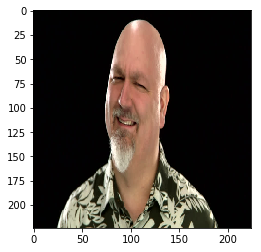

In [4]:
import matplotlib.pyplot as plt                        
%matplotlib inline
i = np.random.choice(len(train_tensors))
img = train_tensors[i]
print(train_targets[i])
plt.imshow(img)

### I. B. Build and Train Network

In [5]:
epochs = 25
batch_size = 200

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(128, (5, 5), input_shape=(224, 224,3)))
model.add(Activation('relu'))
#model.add(Conv2D(64, (5, 5)))
#model.add(Activation('relu'))
#model.add(Conv2D(128, (5, 5)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(3, 3)))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(128, (3, 3)))
#model.add(Activation('relu'))
#model.add(Conv2D(64*2, (3, 3)))
#model.add(Activation('relu'))
#model.add(Conv2D(64*2, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())
#model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

opt = optimizers.RMSprop(lr=1e-5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.find_faces.hdf5', 
                               verbose=1, save_best_only=True)

## Original fit call before using the ImageDataGenerator
#model.fit(train_tensors, train_targets, 
#          validation_data=(valid_tensors, valid_targets),
#          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=2)

# this is the augmentation configuration I will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow(train_tensors, train_targets)
validation_generator = train_datagen.flow(valid_tensors, valid_targets)

model.fit_generator(
        train_generator
        , steps_per_epoch=2000 // batch_size
        , epochs=epochs
        , validation_data=validation_generator
        , validation_steps=800 // batch_size
        , callbacks=[checkpointer], verbose=2)

model.load_weights('saved_models/weights.best.find_faces.hdf5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 128)     9728      
_________________________________________________________________
activation_1 (Activation)    (None, 220, 220, 128)     0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              129000    
_________________________________________________________________
activation_2 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2002      
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total para

### I. C. Get Accuracy Measurement

In [6]:
# get index of predicted dog breed for each image in test set
face_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(face_predictions)==np.argmax(test_targets, axis=1))/len(face_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 79.1304%


## II. Experiment 2
* Positive Category
>* 2202 Human Faces

* Negative Category
>* 1384 Images with no faces

In [7]:
load_data('images\Experiment_2')

  4%|███▎                                                                            | 73/1793 [00:01<00:29, 58.52it/s]D:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
100%|████████████████████████████████████████████████████████████████████████████████| 718/718 [00:16<00:00, 42.34it/s]


### II. A. Check Random Training Image

[ 1.  0.]


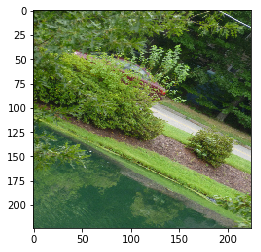

In [8]:
import matplotlib.pyplot as plt                        
%matplotlib inline
i = np.random.choice(len(train_tensors))
img = train_tensors[i]
print(train_targets[i])
plt.imshow(img)

### II. B. Build and Train Network

In [9]:
epochs = 25
batch_size = 200

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(128, (5, 5), input_shape=(224, 224,3)))
model.add(Activation('relu'))
#model.add(Conv2D(64, (5, 5)))
#model.add(Activation('relu'))
#model.add(Conv2D(128, (5, 5)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(3, 3)))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(128, (3, 3)))
#model.add(Activation('relu'))
#model.add(Conv2D(64*2, (3, 3)))
#model.add(Activation('relu'))
#model.add(Conv2D(64*2, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())
#model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

opt = optimizers.RMSprop(lr=1e-5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.find_faces.hdf5', 
                               verbose=1, save_best_only=True)

## Original fit call before using the ImageDataGenerator
#model.fit(train_tensors, train_targets, 
#          validation_data=(valid_tensors, valid_targets),
#          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=2)

# this is the augmentation configuration I will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow(train_tensors, train_targets)
validation_generator = train_datagen.flow(valid_tensors, valid_targets)

model.fit_generator(
        train_generator
        , steps_per_epoch=2000 // batch_size
        , epochs=epochs
        , validation_data=validation_generator
        , validation_steps=800 // batch_size
        , callbacks=[checkpointer], verbose=2)

model.load_weights('saved_models/weights.best.find_faces.hdf5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 220, 220, 128)     9728      
_________________________________________________________________
activation_4 (Activation)    (None, 220, 220, 128)     0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              129000    
_________________________________________________________________
activation_5 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2002      
_________________________________________________________________
activation_6 (Activation)    (None, 2)                 0         
Total para

### II. C. Get Accuracy Measurement

In [10]:
# get index of predicted dog breed for each image in test set
face_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(face_predictions)==np.argmax(test_targets, axis=1))/len(face_predictions)
print('Test accuracy for Experiment 2: %.4f%%' % test_accuracy)

Test accuracy for Experiment 2: 63.0919%


## III. Experiment 3
* Positive Category
>* 2202 Human Faces

* Negative Category
>* 1384 Images with no faces
>* 468 Dog Faces

In [11]:
load_data('images\Experiment_3')

 28%|██████████████████████▍                                                        | 575/2027 [00:13<00:32, 44.22it/s]D:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
100%|████████████████████████████████████████████████████████████████████████████████| 811/811 [00:16<00:00, 48.57it/s]


### III. A. Check Random Training Image

[ 1.  0.]


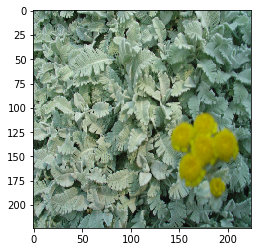

In [12]:
import matplotlib.pyplot as plt                        
%matplotlib inline
i = np.random.choice(len(train_tensors))
img = train_tensors[i]
print(train_targets[i])
plt.imshow(img)

### III. B. Build and Train Network

In [13]:
epochs = 25
batch_size = 200

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(128, (5, 5), input_shape=(224, 224,3)))
model.add(Activation('relu'))
#model.add(Conv2D(64, (5, 5)))
#model.add(Activation('relu'))
#model.add(Conv2D(128, (5, 5)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(3, 3)))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(128, (3, 3)))
#model.add(Activation('relu'))
#model.add(Conv2D(64*2, (3, 3)))
#model.add(Activation('relu'))
#model.add(Conv2D(64*2, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())
#model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

opt = optimizers.RMSprop(lr=1e-5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.find_faces.hdf5', 
                               verbose=1, save_best_only=True)

## Original fit call before using the ImageDataGenerator
#model.fit(train_tensors, train_targets, 
#          validation_data=(valid_tensors, valid_targets),
#          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=2)

# this is the augmentation configuration I will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow(train_tensors, train_targets)
validation_generator = train_datagen.flow(valid_tensors, valid_targets)

model.fit_generator(
        train_generator
        , steps_per_epoch=2000 // batch_size
        , epochs=epochs
        , validation_data=validation_generator
        , validation_steps=800 // batch_size
        , callbacks=[checkpointer], verbose=2)

model.load_weights('saved_models/weights.best.find_faces.hdf5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 220, 220, 128)     9728      
_________________________________________________________________
activation_7 (Activation)    (None, 220, 220, 128)     0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              129000    
_________________________________________________________________
activation_8 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 2002      
_________________________________________________________________
activation_9 (Activation)    (None, 2)                 0         
Total para

### III. C. Get Accuracy Measurement

In [14]:
# get index of predicted dog breed for each image in test set
face_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(face_predictions)==np.argmax(test_targets, axis=1))/len(face_predictions)
print('Test accuracy for Experiment 3: %.4f%%' % test_accuracy)

Test accuracy for Experiment 3: 49.0752%
